<a href="https://colab.research.google.com/github/arstotrix/dh_hackathon_2021/blob/main/analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [181]:
#ЩАС БУДЕТ НЛП
!pip install pymorphy2
import pymorphy2
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words.extend(['meme', 'get', 'people', 'memes', 'image', 'tagged', 'make', 'dont', 'imgflip', 'im'])
morph = pymorphy2.MorphAnalyzer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def getdf(link):
#link = 'https://raw.githubusercontent.com/arstotrix/dh_hackathon_2021/main/mems_metadata_nastya_yescommas.csv'
  data = pd.read_csv(link, sep = ';')
  return data

In [4]:
#для задачи фильтрации
def year_filter(unit):
  if 'month' in unit:
    numeric_filter = filter(str.isdigit, unit)
    unit = "".join(numeric_filter)
    unit = int(unit)
  else:
    unit = 1000
  return unit

In [5]:
df_light = getdf("https://raw.githubusercontent.com/arstotrix/dh_hackathon_2021/main/mems%20metadata%20light.csv")
df_hard = getdf("https://raw.githubusercontent.com/arstotrix/dh_hackathon_2021/main/mems%20metadata%20hard.csv")
df_light = df_light[['ID',	'imgviews',	'imgvotes',	'comments',	'memedate',	'imgname',	'imgtext', 'tagslist2']]
df_hard = df_hard[['ID',	'imgviews',	'imgvotes',	'comments',	'memedate',	'imgname',	'imgtext',	'tagslist2']]

In [6]:
df_light['withinayear'] = df_light['memedate'].apply(year_filter)
df_hard['withinayear'] = df_hard['memedate'].apply(year_filter)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
lightyear = df_light[df_light['withinayear']<100].groupby(df_light['withinayear'])["ID"].count().sort_index(ascending=False)
hardyear = df_hard[df_hard['withinayear']<100].groupby(df_hard['withinayear'])["ID"].count().sort_index(ascending=False)
#.sort_index(ascending=True)

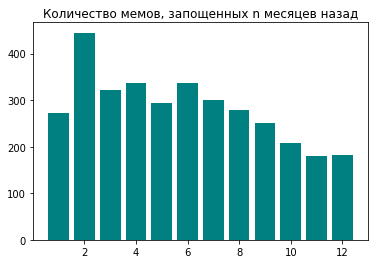

In [8]:
X = hardyear.index
Y = hardyear.values
fig, ax = plt.subplots()
ax.bar(X,Y,color="#008080")
#plt.legend('')
plt.title('Количество мемов, запощенных n месяцев назад')
fig.show()
plt.savefig('teal_data')

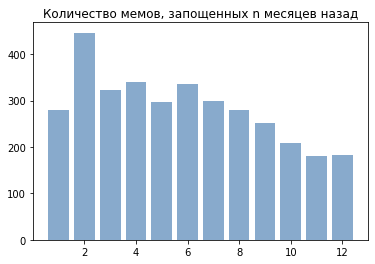

In [106]:
X = lightyear.index
Y = lightyear.values
fig, ax = plt.subplots()
ax.bar(X,Y,color="#88aacc")
#plt.legend('')
plt.title('Количество мемов, запощенных n месяцев назад')
fig.show()
plt.savefig('blue_data')

In [79]:
def freqtag(tags):
  freq = {}
  for tag in tags:
    tag = re.sub('[^a-zA-Z0-9, ]', '', tag)
    if len(tag) > 0:
      tag = tag.split(', ')
      for t in tag:
        #print(t)
        if t in freq:
          freq[t] += 1
        else:
          freq[t] = 1
  freq
  freqdata = pd.DataFrame.from_dict(freq, orient='index')
  return freqdata

In [37]:
def cleaner(tag):
  tag = re.sub('[^a-zA-Z0-9, ]', '', tag)
  if len(tag) > 0:
    tag = tag.split(', ')
  return tag

In [52]:
def counter(i,tag):
  j = 0
  if i in tag:
    j = 1
  return j

In [ ]:
df_lastyear = df_light[['ID',	'withinayear',	'imgname',	'imgtext',	'tagslist2']]
df_lastyear  = df_lastyear[df_lastyear['withinayear'] < 100]

In [118]:
tags = df_light['tagslist2'].dropna().values
freqdata = freqtag(tags)
top_ten = freqdata[0].sort_values(ascending=False)[:10]
top_ten

boardroom meeting suggestion    247
change my mind                  235
the rock driving                217
batman slapping robin           211
two buttons                     206
drake hotline bling             199
hide the pain harold            189
expanding brain                 189
one does not simply             187
surprised pikachu               186
Name: 0, dtype: int64

In [92]:
tags_year = df_lastyear['tagslist2'].dropna().values
freqdata = freqtag(tags_year)
top_ten_2020 = freqdata[0].sort_values(ascending=False)[:10]
top_ten_2020

change my mind                  152
drake hotline bling             135
boardroom meeting suggestion    122
expanding brain                 116
two buttons                     115
surprised pikachu               113
distracted boyfriend            112
woman yelling at cat            108
left exit 12 off ramp           102
roll safe think about it        101
Name: 0, dtype: int64

In [93]:
for i in top_ten_2020.index:
  df_lastyear[i] = np.zeros(df_lastyear.shape[0])
df_lastyear['tagslist2'] = df_lastyear['tagslist2'].apply(cleaner)
for i in top_ten_2020.index:
  for j, n in enumerate(df_lastyear['tagslist2']):  
    df_lastyear[i][j] = 0
    if i in n:
      #print('YES')
      df_lastyear[i][j] = 1
df_lastyear.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


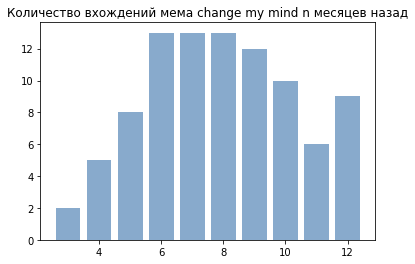

In [107]:
X = df_lastyear[df_lastyear['change my mind'] > 0].groupby(df_lastyear['withinayear'])['change my mind'].count().index
Y = df_lastyear[df_lastyear['change my mind'] > 0].groupby(df_lastyear['withinayear'])['change my mind'].count().values
fig, ax = plt.subplots()
ax.bar(X,Y,color="#88aacc")
#plt.legend('')
plt.title('Количество вхождений мема change my mind n месяцев назад')
fig.show()
plt.savefig('change_my_mind_data')

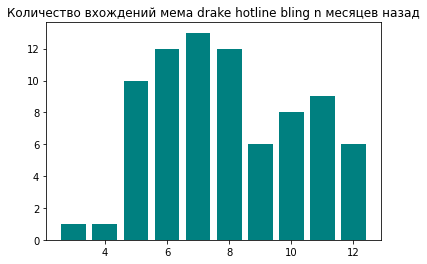

In [108]:
X = df_lastyear[df_lastyear['drake hotline bling'] > 0].groupby(df_lastyear['withinayear'])['drake hotline bling'].count().index
Y = df_lastyear[df_lastyear['drake hotline bling'] > 0].groupby(df_lastyear['withinayear'])['drake hotline bling'].count().values
fig, ax = plt.subplots()
ax.bar(X,Y,color="#008080")
#plt.legend('')
plt.title('Количество вхождений мема drake hotline bling n месяцев назад')
fig.show()
plt.savefig('drake hotline bling_data')

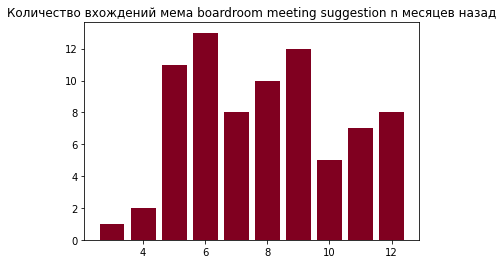

In [184]:
X = df_lastyear[df_lastyear['boardroom meeting suggestion'] > 0].groupby(df_lastyear['withinayear'])['boardroom meeting suggestion'].count().index
Y = df_lastyear[df_lastyear['boardroom meeting suggestion'] > 0].groupby(df_lastyear['withinayear'])['boardroom meeting suggestion'].count().values
fig, ax = plt.subplots()
ax.bar(X,Y,color="#800020")
#plt.legend('')
plt.title('Количество вхождений мема boardroom meeting suggestion n месяцев назад')
fig.show()
plt.savefig('boardroom meeting suggestion_data')

In [111]:
texts_2020 = df_lastyear['imgtext'].dropna().values
texts_2020

array(['  MY NEPHEW TOLD ME THAT WHEN HE GROWS UP HE WANTS TO BE JUST LIKE BATMAN. SO I KILLED HIS PARENTS ',
       '  MAKE A REALLY COOL MEME. IT GETS THOUSANDS OF UPVOTES ON REDDIT. A LOT OF YOUTUBERS PUT IT IN THEIR VIDEO. YOU MADE IT IN AUSTRALIA ',
       '  I TOLD MY DAD I HAD THE BODY OF A GREEK GOD. HE TOLD ME BUDDHA WASN’T GREEK ',
       ...,
       '  I LIKE THE FACT THE WORLD KNOWS I HAVE A RESTING BITCH FACE. DAMN IT ',
       "  JEFFREY EPSTEIN DIDN'T KILL HIMSELF. BUT GOODYEAR DID ",
       "  WHO ARE YOU? I'M WOKEMAN "], dtype=object)

In [158]:
def lemmatokens(sentence):
  sentence1 = []
  sentence = sentence.lower()
  sentence = re.sub('[^A-Za-z ]','', sentence)
  #print(sentence)
  sentence = sentence.split(' ')
  for i, element in enumerate(sentence):
    if len(element)>=1:
      element = morph.parse(element)[0].normal_form
      if element not in stop_words:
        sentence1.append(element)
  sentence1 = ' '.join(sentence1)
  return sentence1

In [135]:
def freqwords(texts):
  freq = {}
  for tag in texts:
    tag = lemmatokens(tag)
    if len(tag)>0:
      tag = tag.split()
      for t in tag:
          if t in freq:
            freq[t] += 1
          else:
            freq[t] = 1
  freqdata = pd.DataFrame.from_dict(freq, orient='index')
  return freqdata

In [182]:
fworddata2020 = freqwords(texts_2020)

In [ ]:
stop_words

In [183]:
fworddata2020.sort_values(by=0, ascending=False)[:10]

,0
one,160
upvote,128
like,127
school,106
go,101
good,96
upvotes,92
coronavirus,91
everyone,84
new,83


In [164]:
def coronapatrol(name):
  j = 0
  if 'coronavirus' in str(name):
    j = 1
  return j

In [165]:
df_lastyear['covid'] = df_lastyear['imgtext'].apply(coronapatrol)

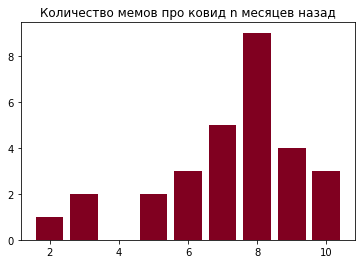

In [179]:
X = df_lastyear[df_lastyear['covid'] > 0].groupby(df_lastyear['withinayear'])['covid'].count().index
Y = df_lastyear[df_lastyear['covid'] > 0].groupby(df_lastyear['withinayear'])['covid'].count().values
fig, ax = plt.subplots()
ax.bar(X,Y,color="#800020")
#plt.legend('')
plt.title('Количество мемов про ковид n месяцев назад')
fig.show()
plt.savefig('covid_data')

In [145]:
texts = df_light['imgtext'].dropna().values

In [ ]:
df_analysis = df_light[['ID',	'memedate',	'imgname',	'imgtext',	'tagslist2']]
for i in top_ten.index:
  df_analysis[i] = np.zeros(df_analysis.shape[0])
df_analysis['tagslist2'] = df_analysis['tagslist2'].apply(cleaner)
for i in top_ten.index:
  for j, n in enumerate(df_analysis['tagslist2']):  
    df_analysis[i][j] = 0
    if i in n:
      #print('YES')
      df_analysis[i][j] = 1

In [83]:
df_analysis.head()

,ID,memedate,imgname,imgtext,tagslist2,boardroom meeting suggestion,change my mind,the rock driving,batman slapping robin,two buttons,drake hotline bling,hide the pain harold,expanding brain,one does not simply,surprised pikachu
0,10769j,5 years ago,Hide the Pain Harold Meme,"OOOH, A COMMENT ON MY MEME. IT'S A PICTURE O...",[hide the pain harold],0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,10e3sj,5 years ago,One Does Not Simply Meme,ONE DOES NOT SIMPLY. RESIST BACON,[one does not simply],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,115m4j,no date,Batman Slapping Robin Meme,DON'T GIVE ME THE SILENT TREATMENT!,[batman slapping robin],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11qu1m,5 years ago,The Rock Driving Meme,"YA KNOW WHAT, YOU NEED TO THINK OUTSIDE THE ...",[the rock driving],0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11v8a,8 years ago,One Does Not Simply Meme,ONE DOES NOT SIMPLY STAY AWAKE IN CLASS,[one does not simply],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
